# Pandas API on Spark

Esta es una introducción corta del API de pandas en spark. Aqui enseñaremos algunas diferencias claves entre pandas y el API de pandas en spark.

In [5]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

In [6]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [7]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

De la misma manera podemos hacer un dataFrame creation

In [8]:
psdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


En este caso pasamos valores de numpy con indices de fechas

In [9]:
dates = pd.date_range('20130101', periods=6)

In [10]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [12]:
pdf

,A,B,C,D
2013-01-01,0.134734,0.600096,0.084897,-0.540492
2013-01-02,2.217229,-0.078944,0.470033,-0.398937
2013-01-03,-0.357696,-0.861316,2.078246,0.141000
2013-01-04,-0.447972,-0.103220,-1.039352,1.362365
2013-01-05,1.262453,-0.767400,1.007569,-0.398406
2013-01-06,-0.340127,0.601478,0.567899,-1.130692


Ahora esto lo podemos convertir a un pandas en spark dataframe

In [13]:
psdf = ps.from_pandas(pdf)


/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


In [15]:
type(psdf)

pyspark.pandas.frame.DataFrame

### Nota
Es importante notar que el pandas on spark dataframe se comporta como un pandas, frame esto nos ayuda para que la transicion de pandas a spark sea suave.

Ahora vamos a crear un pandas on spark dataframe de un spark datafraame

In [16]:
spark = SparkSession.builder.getOrCreate()

In [17]:
sdf = spark.createDataFrame(pdf)

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


In [19]:
sdf.show()

+--------------------+--------------------+-------------------+--------------------+
|                   A|                   B|                  C|                   D|
+--------------------+--------------------+-------------------+--------------------+
|  0.1347340635242184|  0.6000960382033279|0.08489744363483495| -0.5404923202159677|
|  2.2172292536033806| -0.0789439319285748| 0.4700329049037072|-0.39893699227155516|
|-0.35769611541604557| -0.8613158492860004| 2.0782462567238746|  0.1410000347925268|
|-0.44797223295246325|-0.10322015011283567| -1.039352099125737|   1.362365409263763|
|   1.262452704745792| -0.7673995433977786| 1.0075689279292241|  -0.398405908910659|
| -0.3401270029568205|  0.6014778760959136| 0.5678990749685063| -1.1306921679575619|
+--------------------+--------------------+-------------------+--------------------+



In [20]:
psdf = sdf.pandas_api()

In [21]:
psdf

,A,B,C,D
0,0.134734,0.600096,0.084897,-0.540492
1,2.217229,-0.078944,0.470033,-0.398937
2,-0.357696,-0.861316,2.078246,0.141000
3,-0.447972,-0.103220,-1.039352,1.362365
4,1.262453,-0.767400,1.007569,-0.398406
5,-0.340127,0.601478,0.567899,-1.130692


Podemos ver que siguen siendo los mismos comandos que en pandas

In [22]:
psdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [23]:
psdf.head

<bound method DataFrame.head of           A         B         C         D
0  0.134734  0.600096  0.084897 -0.540492
1  2.217229 -0.078944  0.470033 -0.398937
2 -0.357696 -0.861316  2.078246  0.141000
3 -0.447972 -0.103220 -1.039352  1.362365
4  1.262453 -0.767400  1.007569 -0.398406
5 -0.340127  0.601478  0.567899 -1.130692>

In [24]:
psdf.index

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [25]:
psdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
psdf.describe()

23/11/21 10:32:22 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.411437,-0.101551,0.528215,-0.160860
std,1.091483,0.633667,1.028702,0.849604
min,-0.447972,-0.861316,-1.039352,-1.130692
25%,-0.357696,-0.767400,0.084897,-0.540492
50%,-0.340127,-0.103220,0.470033,-0.398937
75%,1.262453,0.600096,1.007569,0.141000
max,2.217229,0.601478,2.078246,1.362365


In [27]:
psdf.T

,0,1,2,3,4,5
A,0.134734,2.217229,-0.357696,-0.447972,1.262453,-0.340127
B,0.600096,-0.078944,-0.861316,-0.103220,-0.767400,0.601478
C,0.084897,0.470033,2.078246,-1.039352,1.007569,0.567899
D,-0.540492,-0.398937,0.141000,1.362365,-0.398406,-1.130692


In [28]:
psdf.sort_index( ascending=False)

,A,B,C,D
5,-0.340127,0.601478,0.567899,-1.130692
4,1.262453,-0.767400,1.007569,-0.398406
3,-0.447972,-0.103220,-1.039352,1.362365
2,-0.357696,-0.861316,2.078246,0.141000
1,2.217229,-0.078944,0.470033,-0.398937
0,0.134734,0.600096,0.084897,-0.540492


In [29]:
psdf.sort_values(by='B')

,A,B,C,D
2,-0.357696,-0.861316,2.078246,0.141000
4,1.262453,-0.767400,1.007569,-0.398406
3,-0.447972,-0.103220,-1.039352,1.362365
1,2.217229,-0.078944,0.470033,-0.398937
0,0.134734,0.600096,0.084897,-0.540492
5,-0.340127,0.601478,0.567899,-1.130692


## Datos faltantes

De la misma manera la API de pandas en spark usa np.nan para datos faltantes

In [30]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [31]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [32]:
psdf1 = ps.from_pandas(pdf1)

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


In [33]:
psdf1

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:563: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


,A,B,C,D,E
2013-01-01,0.134734,0.600096,0.084897,-0.540492,1.0
2013-01-02,2.217229,-0.078944,0.470033,-0.398937,1.0
2013-01-03,-0.357696,-0.861316,2.078246,0.141000,NaN
2013-01-04,-0.447972,-0.103220,-1.039352,1.362365,NaN


De la misma manera en pandas podemos tirar las filas que tienen Nans y tambien podemos llenar los nans con valores

In [34]:
psdf1.dropna(how='any')

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:563: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


,A,B,C,D,E
2013-01-01,0.134734,0.600096,0.084897,-0.540492,1.0
2013-01-02,2.217229,-0.078944,0.470033,-0.398937,1.0


In [35]:
psdf1.fillna(value=5)

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:563: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


,A,B,C,D,E
2013-01-01,0.134734,0.600096,0.084897,-0.540492,1.0
2013-01-02,2.217229,-0.078944,0.470033,-0.398937,1.0
2013-01-03,-0.357696,-0.861316,2.078246,0.141000,5.0
2013-01-04,-0.447972,-0.103220,-1.039352,1.362365,5.0


### Agrupar
De la misma manera que en pandas podemos hacer funciones de agrupacion

In [36]:
psdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [37]:
psdf

,A,B,C,D
0,foo,one,-0.416725,0.071474
1,bar,one,-2.190530,-0.906339
2,foo,two,-1.133473,0.279681
3,bar,three,0.356548,-0.735944
4,foo,two,-0.271503,0.382585
5,bar,two,1.464664,1.073529
6,foo,one,1.217956,0.701974
7,foo,three,-1.613268,0.912621


Ejemplo 1,

importante notar que en versiones recientes de pandas, se toman en cuenta solo los grupos numericos

In [40]:
psdf.groupby('A').sum()

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/pandas/groupby.py:893: FutureWarning: Default value of `numeric_only` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


,C,D
A,,
bar,-0.369318,-0.568755
foo,-2.217012,2.348334


In [41]:
psdf.groupby(['A', 'B']).sum()

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/pandas/groupby.py:893: FutureWarning: Default value of `numeric_only` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


C         D
A   B                        
foo one    0.801232  0.773448
bar one   -2.190530 -0.906339
foo two   -1.404975  0.662266
bar three  0.356548 -0.735944
    two    1.464664  1.073529
foo three -1.613268  0.912621

### Graficar


In [46]:
import matplotlib.pyplot as plt

In [42]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [43]:
psser = ps.Series(pser)

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/sql/pandas/types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


In [44]:
psser = psser.cummax()

/Users/mauriciodiaz/anaconda3/envs/itam/lib/python3.11/site-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas Series is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


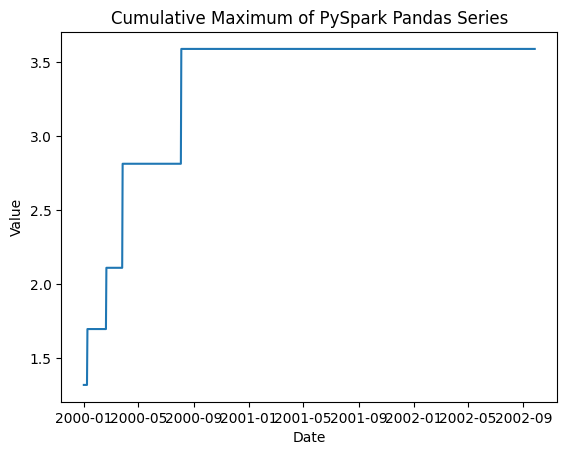

In [49]:
plt.plot(psser.to_pandas())
plt.title('Cumulative Maximum of PySpark Pandas Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### Leer datos
De la misma manera que en pandas, podemos leer datos usando el pandas on spark dataframe

In [ ]:
psdf.to_csv('foo.csv')
ps.read_csv('foo.csv').head(10)

In [ ]:
psdf.to_spark_io('zoo.orc', format="orc")
ps.read_spark_io('zoo.orc', format="orc").head(10)